Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

## LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot 
from sklearn import datasets
from sklearn.linear_model import LinearRegression

First, lets remember linear regression. The goal is to learn a set of weights $\theta$ to predict a value $y$, based on a datapoint $x$. If $x$ has $d$ features, this looks like:

$$ {h_\theta}(x) = \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_{d-1} \cdot x_{d-1} + \theta_d \cdot x_d$$

Written with more math-like notation, that becomes

$${h_\theta}(x) = \sum_{i=1}^d \theta_i \cdot x_i = \theta^T x$$


To learn these weights $\theta$ we use our training data. We have $m$ datapoints, $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ and associated labels $y^{(1)}, y^{(2)}, \ldots, y^{(m)}$. 

We will use what is called a ***cost function*** or an ***objective function***. It is a function that describes a score we want to minimize in order to achieve our goal. For linear regression, our cost function is parameterized with $\theta$.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Optimization is done using a gradient, so we a need a gradient:

$$\nabla_\theta J = \frac{1}{m} \sum_{i=1}^n x^{(i)} \cdot \underbrace{( \theta^T x^{(i)}-y^{(i)})}_{\text{The error}}$$

Lets look at some naive code for this. 

Assume there is only one variable ($\theta_1$), there is not even bias(intercept) term ($\theta_0$).

Notation: w is used instead of $\theta_1$, @ stands for dot product, X denotes data points ($x^{(1)}, x^{(2)}, \ldots, x^{(m)}$), and y denotes  labels ($y^{(1)}, y^{(2)}, \ldots, y^{(m)}$).

In [2]:
def _gradient_step(w, error, rate = 0.3):
    update = error * rate
    return w - update
  
def linear_regression(X,y):
  def objective_func(w):
    return np.sum((X @ w - y) * (X @ w - y))/(2*len(y))
  def gradient(w):
    return np.sum([X[i] * (X[i]*w - y[i]) for i in range(y.shape[0])])/len(y)

  #Lets pick some starting value for our weight vector. 
  w = np.zeros(X.shape[1])
  
  for i in range(30):
    w = _gradient_step(w, gradient(w))
    print(w,objective_func(w))
  return w  
  

We will use make_regression() function to make a toy regression problem. [See documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html )

<class 'tuple'>


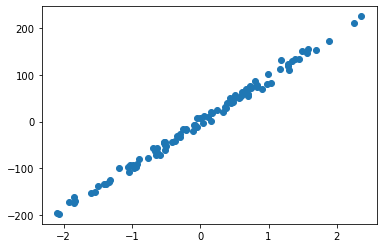

In [3]:
# Line below generates a random regression problem (no_of_samples, no_of_features ..)
data = datasets.make_regression(100,1,noise = 7)
print(type(data))
#display(data)
pyplot.plot(data[0][:], data[1][:], marker="o", linestyle='')
#a=data[0]
#b=data[1]
#print(type(a), type(b))
#print(a.shape, b.shape)
#help(pyplot.plot)

In [4]:
w = linear_regression(data[0], data[1])
# remember, what it prints are w(theta_1) and current value of objective_func

[28.99922413] 2200.038564700116
[49.06049915] 1065.2592859542513
[62.93862063] 522.1894225572196
[72.53931928] 262.29317484284843
[79.18095407] 137.91496104638958
[83.7755481] 78.39143885918463
[86.95402674] 49.905343220532274
[89.15285571] 36.27278898117858
[90.67397616] 29.748674990746384
[91.72626692] 26.626438129419153
[92.45422758] 25.132233240827855
[92.95782102] 24.417153524505174
[93.30620021] 24.07493874218158
[93.54720428] 23.91116545289988
[93.71392767] 23.832788679985427
[93.82926467] 23.79528000833679
[93.90905327] 23.777329531473182
[93.96424995] 23.768738994792773
[94.00243428] 23.764627832676137
[94.02884968] 23.762660359096994
[94.04712351] 23.761718787790688
[94.0597651] 23.761268181218746
[94.06851038] 23.76105253500979
[94.07456024] 23.760949333480266
[94.07874546] 23.760899944456696
[94.08164074] 23.760876308415064
[94.08364365] 23.760864996944928
[94.08502924] 23.760859583629202
[94.08598778] 23.760856992985637
[94.08665088] 23.76085575318466


## Solving linear regression with Scikit-learn.
The toy implementation above is just for demonstration, and doesn't have all the features we would want when doing some real machine learning. 
Below we will use Scikit-learn's implementation.

First lets put the data into a *dataframe*. We do not have to, but sometimes it makes things easier.

In [5]:
df=pd.DataFrame(data=np.c_[data[0],data[1]], columns=['X','Y'])
#np.c_[a,b] is the same with np.column_stack((a,b))
#similarly there is also np.r_[a,b] for row stack
display(df)

,X,Y
0,0.713488,72.221642
1,-1.029819,-91.750417
2,1.451645,133.534058
3,-0.501700,-52.832988
4,-0.295014,-32.731143
...,...,...
95,-2.099333,-194.576502
96,0.379619,29.814114
97,-0.935080,-96.308375
98,-0.763272,-76.703793


In [6]:
df.head()

,X,Y
0,0.713488,72.221642
1,-1.029819,-91.750417
2,1.451645,133.534058
3,-0.501700,-52.832988
4,-0.295014,-32.731143


In [7]:
X = df['X'].values.reshape(-1, 1) 
#X = df['X'].values
Y = df['Y'].values.reshape(-1, 1)
print(X.shape)
print(Y.shape)
#help(df.values.reshape)

(100, 1)
(100, 1)


Now we are ready to call the built-in function for linear regression.

In [8]:
lr = LinearRegression()
lr.fit(X,Y)
#help(lr)

#A note on normalization
#In LinearRegression() default value for 'normalize' parameter is True.
#I.e. X will be normalized before regression by subtracting the mean and dividing by the l2-norm

LinearRegression()

In [9]:
lr.coef_, lr.intercept_

(array([[94.09288194]]), array([-0.30047259]))

This new version has so-called ***intercept*** ($\theta_0$ in lecture notes).

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1$$

So this solution corresponds to the line  y = lr.intercept_ + x*lr.coef_

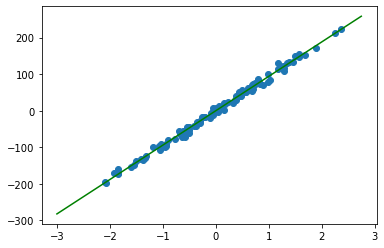

In [10]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
steps = list(np.arange(-3,3,.25))
fitline = list(map(f, steps))
pyplot.plot(steps, fitline, color='green')
pyplot.scatter(x=df.X,y=df.Y)

With the intercept term, our fit line does not have to pass through (0,0) point anymore. Why it is important? Lets modify our data points by moving them up:

In [11]:
df["Y"] += 40

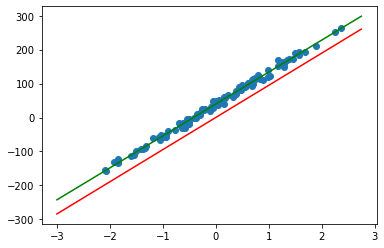

In [12]:
lr_a = LinearRegression(fit_intercept=False)
lr_a.fit(df['X'].values.reshape(-1, 1),df['Y'])

lr_b = LinearRegression(fit_intercept=True)
lr_b.fit(df['X'].values.reshape(-1, 1),df['Y'])

f = lambda x: lr_a.coef_[0] * x + lr_a.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='red')

f = lambda x: lr_b.coef_[0] * x + lr_b.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='green')

pyplot.scatter(x=df.X,y=df.Y)

## BOSTON dataset

In [13]:
data = datasets.load_boston()

In [14]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [15]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [17]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

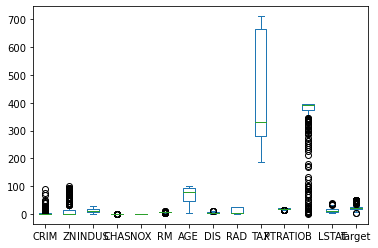

In [19]:
housing_df.plot.box()

<AxesSubplot:>

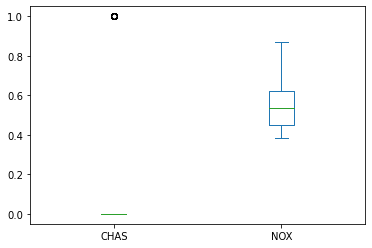

In [20]:
housing_df[['CHAS','NOX']].plot.box()

<AxesSubplot:xlabel='NOX', ylabel='target'>

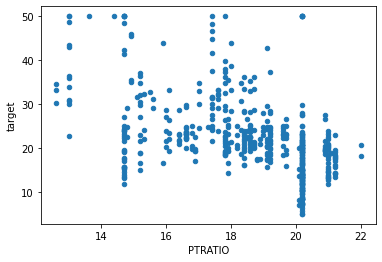

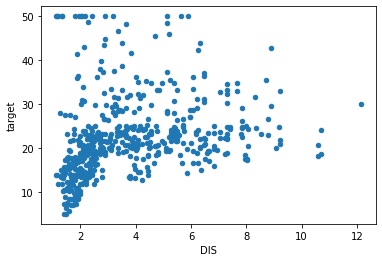

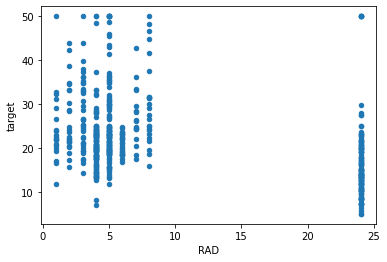

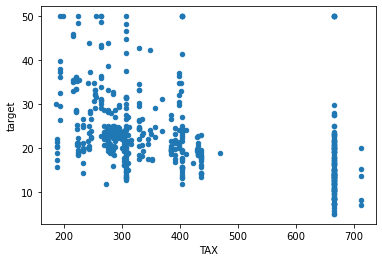

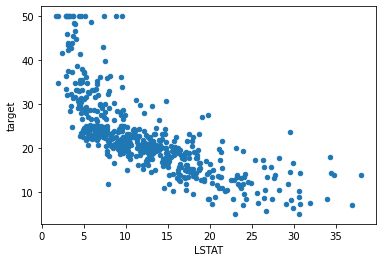

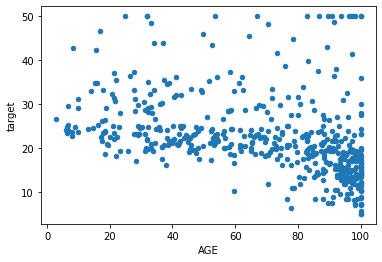

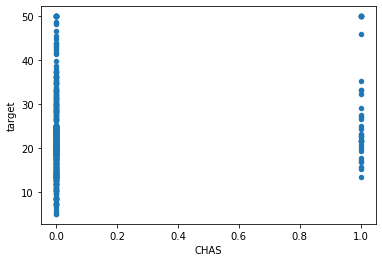

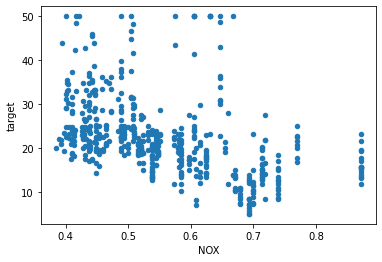

In [21]:
housing_df.plot.scatter(x='PTRATIO',y='target')   #pupil-teacher ratio by town
housing_df.plot.scatter(x='DIS',y='target')  #weighted distances to five Boston employment centres
housing_df.plot.scatter(x='RAD',y='target')  #index of accessibility to radial highways
housing_df.plot.scatter(x='TAX',y='target')  #full-value property-tax rate per $10,000
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population
housing_df.plot.scatter(x='AGE',y='target')   #proportion of owner-occupied units built prior to 1940
housing_df.plot.scatter(x='CHAS',y='target')  #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
housing_df.plot.scatter(x='NOX',y='target')  #nitric oxides concentration (parts per 10 million)

In [22]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [23]:
lr.fit(X,y)
#help(lr)

LinearRegression()

In [24]:
print(lr.predict([X.iloc[501]])*1000)
#print((np.dot(lr.coef_,X.iloc[501])+lr.intercept_)*1000)
print(y.iloc[501]*1000)

[23533.34054667]
22400.0


In [25]:
print(lr.score(X,y))
help(lr.score)

0.7406426641094095
Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_sam

In [26]:
print(lr.coef_)
print(lr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855


# Homework #1   Due date: 18 June 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear Regression. What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.



#### Q1) One feature regression for Boston data. 

In [32]:
correlationmatrix=housing_df.corr()                           #getting the correlation matrix using .corr()

In [33]:
import seaborn as sns                               #importing seaborn for plotting

<AxesSubplot:>

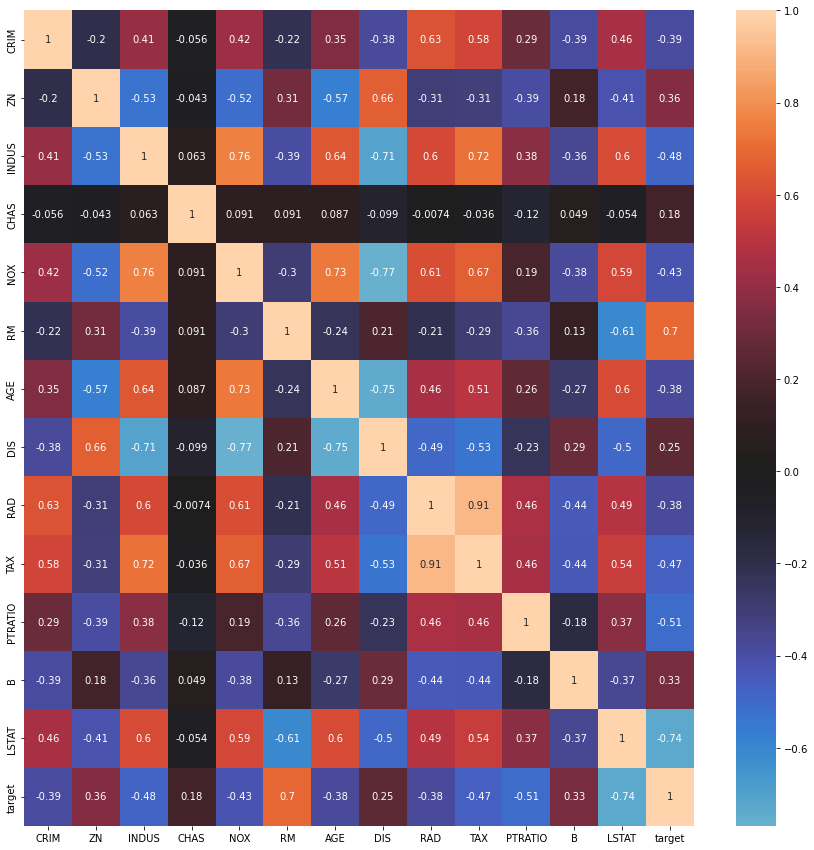

In [39]:
pyplot.subplots(figsize=(15,15))
sns.heatmap(correlationmatrix, annot=True, center=0)

We can see from the correlation matrices above that there are two characteristics that have a near-70 percent connection with the objective
(i). "RM" is 70% directly connected to the target
(ii). "LSAT" has a 74 percent inversly associated relationship with the target

I'd want to choose "LSAT" because it has a strong correlation.

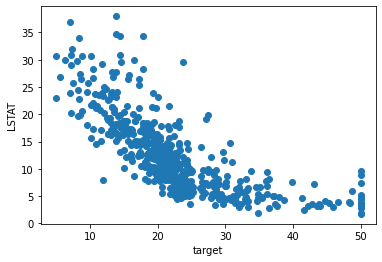

In [40]:
pyplot.xlabel("target")
pyplot.ylabel("LSTAT")
pyplot.scatter(housing_df.target,housing_df.LSTAT)

A straight line has the equation y = mx + b, where m is the slope and b is the intercept.
For one feature linear regression model, "X" values are the inputs that will be given to the model to discover "Y" in this model "X" = "LSTAT," "Y" = "target."

In [41]:
X=housing_df.LSTAT.values.reshape(-1,1)
Y=housing_df.target.values.reshape(-1,1)
print(X.shape)
print(Y.shape)

(506, 1)
(506, 1)


In [42]:
lr= LinearRegression()
lr.fit(X,Y)

LinearRegression()

In [43]:
lr.coef_, lr.intercept_

(array([[-0.95004935]]), array([34.55384088]))

In [44]:
#Y=(coeff*X)+intercept
lr_equation= (-0.95004935*4.98)+34.55384088                      #lets try for LSTAT value as 4.98
lr_equation

29.822595117000002

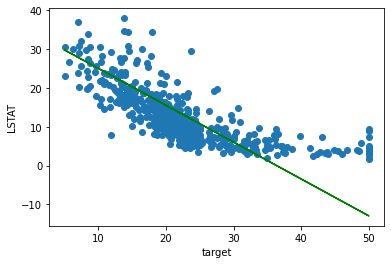

In [47]:
pyplot.xlabel('target')                                              #plotting the fit line
pyplot.ylabel('LSTAT')
pyplot.scatter(housing_df.target,housing_df.LSTAT)
pyplot.plot(housing_df.target,lr.predict(housing_df[['target']]),color='green')

#### Q2) Another metric for performance evaluation

In [55]:
Y_pred

array([[ 1.17526564e+01],
       [ 1.40327748e+01],
       [ 1.58712830e+00],
       [ 2.82219246e+00],
       [ 1.62054273e-01],
       [ 7.28742443e+00],
       [ 1.27977107e+01],
       [ 8.80750339e+00],
       [ 1.88780265e+01],
       [ 1.65979081e+01],
       [ 2.03031006e+01],
       [ 1.65979081e+01],
       [ 1.39377699e+01],
       [ 1.51728341e+01],
       [ 1.72629426e+01],
       [ 1.56478587e+01],
       [ 1.26077008e+01],
       [ 1.79279772e+01],
       [ 1.53628439e+01],
       [ 1.72629426e+01],
       [ 2.16331697e+01],
       [ 1.59328735e+01],
       [ 2.01130907e+01],
       [ 2.07781252e+01],
       [ 1.97330710e+01],
       [ 2.13481549e+01],
       [ 1.87830216e+01],
       [ 2.04931104e+01],
       [ 1.70729328e+01],
       [ 1.46028045e+01],
       [ 2.24882141e+01],
       [ 2.07781252e+01],
       [ 2.20131894e+01],
       [ 2.21081943e+01],
       [ 2.17281746e+01],
       [ 1.65979081e+01],
       [ 1.55528538e+01],
       [ 1.46028045e+01],
       [ 1.1

In [54]:
Y_pred=lr.predict(Y)                                            #Calculating MSSE
Msse = np.square(np.subtract(Y_pred,Y)).mean()
print("MSSE =", Msse)

MSSE = 409.1231791655157
